In [209]:
from geopy.geocoders import Nominatim
from geopy.distance import great_circle
from sklearn import preprocessing
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import norm
import mysql.connector
from sqlalchemy import create_engine
import pymysql

In [210]:
# dataframe:
df = pd.read_csv('C:\\Users\\mojiway\\Desktop\\recom\\recom_table_2.csv',index_col=None)

In [211]:
df

,Hotel_ID,city,hotel_name,stars,lat,lon,bookings,RNS,GBV,GBV_per_RNS,commission_earned
0,242495,Boston,The Godfrey Hotel Boston,4-star,42.354662,-71.061475,107,189,27007,143,1648
1,53230,Marrakech,La Mamounia,5-star,31.621885,-7.997605,5,11,9068,824,553
2,311703,Nassau,Grand Hyatt At Baha Mar,4-star,25.070796,-77.396624,7,36,8416,234,514
3,8303,Bangkok,Shangri-La Hotel Bangkok,5-star,13.720692,100.513980,10,30,8151,272,497
4,8519,Bali,Four Seasons Resort Bali at Sayan,5-star,-8.495717,115.244937,5,18,7877,438,481
5,134368,Hoboken,W Hoboken,4-star,40.739162,-74.027744,17,32,7438,232,454
6,55850,San Francisco,Hotel Union Square,3-star,37.785872,-122.407731,13,38,7267,191,444
7,67930,New York,Hotel Pennsylvania,2-star,40.749943,-73.990941,17,38,6742,177,416
8,896,Phuket,Twinpalms Phuket Hotel,5-star,7.977388,98.280226,3,15,6524,435,398
9,64912,Honolulu,Alohilani Resort Waikiki Beach,3-star,21.274273,-157.823954,5,19,6344,334,390


In [212]:
df['commission'] =  0.15

In [213]:
df.head()

,Hotel_ID,city,hotel_name,stars,lat,lon,bookings,RNS,GBV,GBV_per_RNS,commission_earned,commission
0,242495,Boston,The Godfrey Hotel Boston,4-star,42.354662,-71.061475,107,189,27007,143,1648,0.15
1,53230,Marrakech,La Mamounia,5-star,31.621885,-7.997605,5,11,9068,824,553,0.15
2,311703,Nassau,Grand Hyatt At Baha Mar,4-star,25.070796,-77.396624,7,36,8416,234,514,0.15
3,8303,Bangkok,Shangri-La Hotel Bangkok,5-star,13.720692,100.513980,10,30,8151,272,497,0.15
4,8519,Bali,Four Seasons Resort Bali at Sayan,5-star,-8.495717,115.244937,5,18,7877,438,481,0.15


In [214]:
# input fields:
selected_hotel_id = 786
#lat_input =  13.72069246
#lon_input = 100.51398
#distance_input = 5
#stars_input = '4-stars
selected_hotel_city = df.loc[df['Hotel_ID'] == selected_hotel_id, 'city'].values[0]
selected_hotel_stars = df.loc[df['Hotel_ID'] == selected_hotel_id, 'stars'].values[0]
selected_hotel_lat = df.loc[df['Hotel_ID'] == selected_hotel_id, 'lat'].values[0]
selected_hotel_lon = df.loc[df['Hotel_ID'] == selected_hotel_id, 'lon'].values[0]

In [215]:
selected_hotel_city, selected_hotel_stars, selected_hotel_lat, selected_hotel_lon

('Bangkok', '5-star', 13.72322875, 100.5396878)

In [216]:
# data slicing based on the distribution:
def dist(col):
    mean, std = norm.fit(col)
    p0 = mean + 2 * std
    p1 = mean + std
    p2 = mean
    p3 = mean-std if std < mean else mean-0.4*std
    return p0, p1, p2, p3

In [217]:
gbv_rns_slices = dist(df['GBV_per_RNS'])
df.loc[df['GBV_per_RNS'] > gbv_rns_slices[0], 'gbv_rns_rank'] = 1000
df.loc[(df['GBV_per_RNS'] <gbv_rns_slices[0]) & (df['GBV_per_RNS'] > gbv_rns_slices[1]) , 'gbv_rns_rank'] = 750
df.loc[(df['GBV_per_RNS'] <gbv_rns_slices[1]) & (df['GBV_per_RNS'] > gbv_rns_slices[2]) , 'gbv_rns_rank'] = 500
df.loc[(df['GBV_per_RNS'] <gbv_rns_slices[2]) & (df['GBV_per_RNS'] > gbv_rns_slices[3]) , 'gbv_rns_rank'] = 250
df.loc[df['GBV_per_RNS'] < gbv_rns_slices[3], 'gbv_rns_rank'] = 100

In [218]:
df['estimated_revenue'] = df['gbv_rns_rank'] * df['commission']

In [219]:

estimated_revenue_slices = dist(df['estimated_revenue'])
df.loc[df['estimated_revenue'] > estimated_revenue_slices[0], 'revenue_rank'] = 1000
df.loc[(df['estimated_revenue']< estimated_revenue_slices[0]) & (df['estimated_revenue'] > estimated_revenue_slices[1]) , 'revenue_rank'] = 750
df.loc[(df['estimated_revenue']< estimated_revenue_slices[1]) & (df['estimated_revenue'] > estimated_revenue_slices[2]) , 'revenue_rank'] = 500
df.loc[(df['estimated_revenue']< estimated_revenue_slices[2]) & (df['estimated_revenue'] > estimated_revenue_slices[3]) , 'revenue_rank'] = 250
df.loc[df['estimated_revenue'] < estimated_revenue_slices[3], 'revenue_rank'] = 100


In [220]:
gbv_rns_slices

(436.14003498631484,
 301.48371718355986,
 166.82739938080496,
 32.171081578050035)

In [221]:
df['city_rank'] = np.where(df['city'] == selected_hotel_city, 1, 0)

In [222]:
df['star_rank'] = np.where(df['stars']== selected_hotel_stars, 1, 0)

In [223]:
df

,Hotel_ID,city,hotel_name,stars,lat,lon,bookings,RNS,GBV,GBV_per_RNS,commission_earned,commission,gbv_rns_rank,estimated_revenue,revenue_rank,city_rank,star_rank
0,242495,Boston,The Godfrey Hotel Boston,4-star,42.354662,-71.061475,107,189,27007,143,1648,0.15,250.0,37.5,250.0,0,0
1,53230,Marrakech,La Mamounia,5-star,31.621885,-7.997605,5,11,9068,824,553,0.15,1000.0,150.0,1000.0,0,1
2,311703,Nassau,Grand Hyatt At Baha Mar,4-star,25.070796,-77.396624,7,36,8416,234,514,0.15,500.0,75.0,500.0,0,0
3,8303,Bangkok,Shangri-La Hotel Bangkok,5-star,13.720692,100.513980,10,30,8151,272,497,0.15,500.0,75.0,500.0,1,1
4,8519,Bali,Four Seasons Resort Bali at Sayan,5-star,-8.495717,115.244937,5,18,7877,438,481,0.15,1000.0,150.0,1000.0,0,1
5,134368,Hoboken,W Hoboken,4-star,40.739162,-74.027744,17,32,7438,232,454,0.15,500.0,75.0,500.0,0,0
6,55850,San Francisco,Hotel Union Square,3-star,37.785872,-122.407731,13,38,7267,191,444,0.15,500.0,75.0,500.0,0,0
7,67930,New York,Hotel Pennsylvania,2-star,40.749943,-73.990941,17,38,6742,177,416,0.15,500.0,75.0,500.0,0,0
8,896,Phuket,Twinpalms Phuket Hotel,5-star,7.977388,98.280226,3,15,6524,435,398,0.15,750.0,112.5,750.0,0,1
9,64912,Honolulu,Alohilani Resort Waikiki Beach,3-star,21.274273,-157.823954,5,19,6344,334,390,0.15,750.0,112.5,750.0,0,0


In [224]:

booking_slices = dist(df['bookings'])
df.loc[df['bookings'] > booking_slices[0], 'booking_rank'] = 1000
df.loc[(df['bookings'] < booking_slices[0]) & (df['bookings'] > booking_slices [1]) , 'booking_rank'] = 750
df.loc[(df['bookings'] <booking_slices[1]) & (df['bookings'] > booking_slices [2]) , 'booking_rank'] = 500
df.loc[(df['bookings'] < booking_slices[2]) & (df['bookings'] > booking_slices [3]) , 'booking_rank'] = 250
df.loc[df['bookings'] < booking_slices[3], 'booking_rank'] = 100

In [225]:
booking_slices

(9.279818707452664, 5.617463533292895, 1.9551083591331269, 0.49016628946921936)

In [226]:
df

,Hotel_ID,city,hotel_name,stars,lat,lon,bookings,RNS,GBV,GBV_per_RNS,commission_earned,commission,gbv_rns_rank,estimated_revenue,revenue_rank,city_rank,star_rank,booking_rank
0,242495,Boston,The Godfrey Hotel Boston,4-star,42.354662,-71.061475,107,189,27007,143,1648,0.15,250.0,37.5,250.0,0,0,1000.0
1,53230,Marrakech,La Mamounia,5-star,31.621885,-7.997605,5,11,9068,824,553,0.15,1000.0,150.0,1000.0,0,1,500.0
2,311703,Nassau,Grand Hyatt At Baha Mar,4-star,25.070796,-77.396624,7,36,8416,234,514,0.15,500.0,75.0,500.0,0,0,750.0
3,8303,Bangkok,Shangri-La Hotel Bangkok,5-star,13.720692,100.513980,10,30,8151,272,497,0.15,500.0,75.0,500.0,1,1,1000.0
4,8519,Bali,Four Seasons Resort Bali at Sayan,5-star,-8.495717,115.244937,5,18,7877,438,481,0.15,1000.0,150.0,1000.0,0,1,500.0
5,134368,Hoboken,W Hoboken,4-star,40.739162,-74.027744,17,32,7438,232,454,0.15,500.0,75.0,500.0,0,0,1000.0
6,55850,San Francisco,Hotel Union Square,3-star,37.785872,-122.407731,13,38,7267,191,444,0.15,500.0,75.0,500.0,0,0,1000.0
7,67930,New York,Hotel Pennsylvania,2-star,40.749943,-73.990941,17,38,6742,177,416,0.15,500.0,75.0,500.0,0,0,1000.0
8,896,Phuket,Twinpalms Phuket Hotel,5-star,7.977388,98.280226,3,15,6524,435,398,0.15,750.0,112.5,750.0,0,1,500.0
9,64912,Honolulu,Alohilani Resort Waikiki Beach,3-star,21.274273,-157.823954,5,19,6344,334,390,0.15,750.0,112.5,750.0,0,0,500.0


In [227]:
gbv_slices = dist(df['GBV'])
df.loc[df['GBV'] > gbv_slices[0], 'GBV'] = 1000
df.loc[(df['GBV'] < gbv_slices[0]) & (df['GBV'] > gbv_slices[1]) , 'gbv_rank'] = 750
df.loc[(df['GBV'] < gbv_slices[1]) & (df['GBV'] >gbv_slices[2]) , 'gbv_rank'] = 500
df.loc[(df['GBV'] < gbv_slices[2]) & (df['GBV'] > gbv_slices[3]) , 'gbv_rank'] = 250
df.loc[df['GBV'] < gbv_slices[3], 'gbv_rank'] = 100

In [228]:
#gbv_slices

In [229]:
def distancer(row):
    coords_1 = (row['lat'], row['lon'])
    coords_2 = (selected_hotel_lat, selected_hotel_lon)
    return round(great_circle(coords_1, coords_2).miles, 2)
df['distance'] = df.apply(distancer, axis=1)


In [230]:


df.loc[df['distance'] < 0.5, 'distance_rank'] = 1000
df.loc[(df['distance'] > 0.5) & (df['distance'] < 1) , 'distance_rank'] = 750
df.loc[(df['distance'] > 1) & (df['distance'] < 2 ) , 'distance_rank'] = 500
df.loc[(df['distance'] > 2) & (df['distance'] < 5) , 'distance_rank'] = 250
df.loc[df['distance'] > 5, 'distance_rank'] = 100

(array([72.,  3., 12., 37., 15., 12., 15., 49., 24.,  3.,  1., 52., 31.,
        13.,  9., 41.,  1.,  0., 13.,  0.,  1., 10.,  3., 25., 10.,  5.,
         0.,  9.,  1.,  0.,  2.,  0.,  3.,  2., 15., 15., 17., 54., 35.,
         4.,  6.,  2.,  4., 21., 31., 30., 29., 39., 58., 20.,  7., 17.,
         0., 19., 14.,  4.,  0.,  0.,  2., 11.,  9.,  1.,  0.,  1., 20.,
         7.,  0., 52., 32., 36., 29.,  9.,  0.,  6.,  4.,  3., 12., 34.,
        11., 63.,  2., 17.,  5.,  2.,  2.,  0.,  0.,  1.,  2.,  2.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([    0.    ,   122.3953,   244.7906,   367.1859,   489.5812,
          611.9765,   734.3718,   856.7671,   979.1624,  1101.5577,
         1223.953 ,  1346.3483,  1468.7436,  1591.1389,  1713.5342,
         1835.9295,  1958.3248,  2080.7201,  2203.1154,  2325.5107,
         2447.906 ,  2570.3013,  2692.6966,  2815.0919,  2937.4872,
         3059.8825,  3182.2778,  3304.6731,  3427.0684,  3549.4637,
         3671.859 ,  3794.

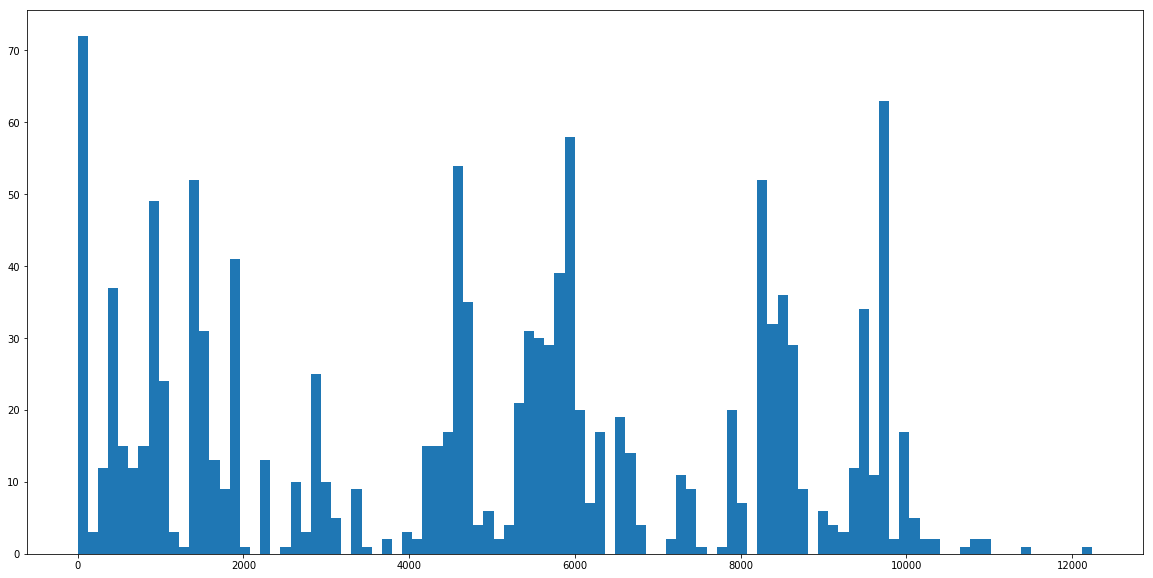

In [231]:
plt.figure(figsize=(20,10))
plt.hist(df['distance'], bins=100)

In [232]:
df['rnk'] = (2*df['gbv_rns_rank'] + 2*df['booking_rank'] \
             + 2*df['gbv_rank'] + 5*df['estimated_revenue'] + 10* df['distance_rank'])*df['city_rank'] * df['star_rank']


In [233]:
df.sort_values(by=['rnk'], ascending=False)

,Hotel_ID,city,hotel_name,stars,lat,lon,bookings,RNS,GBV,GBV_per_RNS,...,gbv_rns_rank,estimated_revenue,revenue_rank,city_rank,star_rank,booking_rank,gbv_rank,distance,distance_rank,rnk
15,786,Bangkok,Banyan Tree Bangkok,5-star,13.723229,100.539688,7,21,1000,249,...,500.0,75.0,500.0,1,1,750.0,500.0,0.00,1000.0,13875.0
843,8660,Bangkok,The Sukhothai Bangkok,5-star,13.723392,100.540829,1,1,190,190,...,500.0,75.0,500.0,1,1,250.0,250.0,0.08,1000.0,12375.0
818,788,Bangkok,SO Sofitel Bangkok,5-star,13.726149,100.543163,1,1,199,199,...,500.0,75.0,500.0,1,1,250.0,250.0,0.31,1000.0,12375.0
1151,12608,Bangkok,Siri Sathorn Executive Serviced,5-star,13.725514,100.538588,1,1,83,83,...,250.0,37.5,250.0,1,1,250.0,100.0,0.17,1000.0,11387.5
374,33,Bangkok,Pullman Hotel G,5-star,13.725942,100.525867,2,5,646,129,...,250.0,37.5,250.0,1,1,500.0,250.0,0.95,750.0,9687.5
3,8303,Bangkok,Shangri-La Hotel Bangkok,5-star,13.720692,100.513980,10,30,1000,272,...,500.0,75.0,500.0,1,1,1000.0,500.0,1.73,500.0,9375.0
89,3572,Bangkok,The Landmark Bangkok,5-star,13.741121,100.553985,3,14,2119,151,...,250.0,37.5,250.0,1,1,500.0,750.0,1.56,500.0,8187.5
520,8652,Bangkok,Radisson Blu Plaza Bangkok,5-star,13.734614,100.564088,2,2,413,207,...,500.0,75.0,500.0,1,1,500.0,250.0,1.82,500.0,7875.0
225,8274,Bangkok,Grande Centre Point Ratchadamri,5-star,13.741604,100.541049,2,8,1055,132,...,250.0,37.5,250.0,1,1,500.0,500.0,1.27,500.0,7687.5
162,8455,Bangkok,Grand Sukhumvit,5-star,13.738989,100.554599,4,15,1422,95,...,250.0,37.5,250.0,1,1,500.0,500.0,1.48,500.0,7687.5


(array([ 49.,  84., 112.,  91.,  85.,  69.,  56.,  56.,  43.,  39.,  37.,
         30.,  34.,  27.,  12.,  29.,  19.,  12.,  20.,  14.,  17.,  16.,
         13.,  18.,   7.,  14.,   9.,  12.,  12.,   9.,  10.,  48.,   5.,
          7.,   8.,   9.,   7.,   3.,   5.,   8.,   4.,   5.,   2.,   1.,
          4.,   5.,   8.,   9.,   4.,   3.,   1.,   3.,   2.,   2.,   1.,
          2.,   8.,   5.,   1.,   4.,   1.,   2.,   2.,   1.,   5.,   1.,
          2.,   2.,   2.,   1.,   2.,   5.,   0.,   0.,   3.,   4.,   0.,
          2.,   1.,   4.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   0.,
          0.,   3.,   0.,   0.,   3.,   1.,   0.,   2.,   0.,   0.,   1.,
          1.]),
 array([  18.  ,   49.44,   80.88,  112.32,  143.76,  175.2 ,  206.64,
         238.08,  269.52,  300.96,  332.4 ,  363.84,  395.28,  426.72,
         458.16,  489.6 ,  521.04,  552.48,  583.92,  615.36,  646.8 ,
         678.24,  709.68,  741.12,  772.56,  804.  ,  835.44,  866.88,
         898.32,  929.76,  961.2 ,

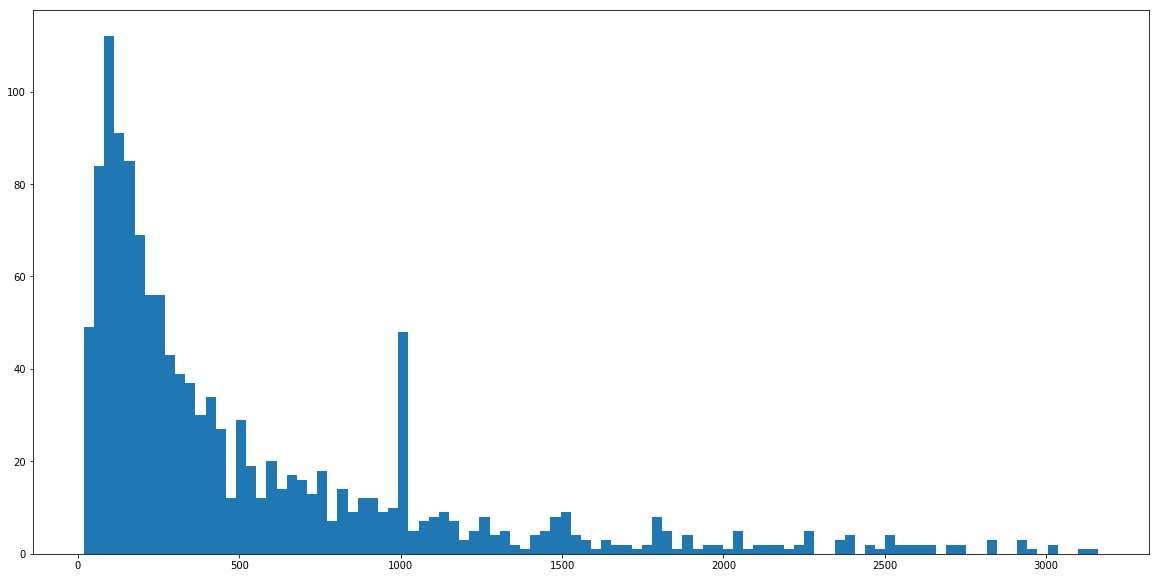

In [234]:
plt.figure(figsize=(20,10))
plt.hist(df['GBV'], bins=100)

In [235]:
dist(df['GBV'])

(1741.3944512303797, 1142.6898726740133, 543.9852941176471, 304.50346269510055)

In [236]:
mean, std = norm.fit(df['GBV'])

In [237]:
mean, std

(543.9852941176471, 598.7045785563663)

In [238]:

df = df[df['rnk'] != 0]
df = df[df['distance'] != 0]
#df_final = df.sort_values(['distance', 'rnk'], ascending=[1,0]).reset_index(drop=True)
df_final = df.sort_values('rnk', ascending=False).reset_index(drop=True)

In [239]:
df_final

,Hotel_ID,city,hotel_name,stars,lat,lon,bookings,RNS,GBV,GBV_per_RNS,...,gbv_rns_rank,estimated_revenue,revenue_rank,city_rank,star_rank,booking_rank,gbv_rank,distance,distance_rank,rnk
0,788,Bangkok,SO Sofitel Bangkok,5-star,13.726149,100.543163,1,1,199,199,...,500.0,75.0,500.0,1,1,250.0,250.0,0.31,1000.0,12375.0
1,8660,Bangkok,The Sukhothai Bangkok,5-star,13.723392,100.540829,1,1,190,190,...,500.0,75.0,500.0,1,1,250.0,250.0,0.08,1000.0,12375.0
2,12608,Bangkok,Siri Sathorn Executive Serviced,5-star,13.725514,100.538588,1,1,83,83,...,250.0,37.5,250.0,1,1,250.0,100.0,0.17,1000.0,11387.5
3,33,Bangkok,Pullman Hotel G,5-star,13.725942,100.525867,2,5,646,129,...,250.0,37.5,250.0,1,1,500.0,250.0,0.95,750.0,9687.5
4,8303,Bangkok,Shangri-La Hotel Bangkok,5-star,13.720692,100.513980,10,30,1000,272,...,500.0,75.0,500.0,1,1,1000.0,500.0,1.73,500.0,9375.0
5,3572,Bangkok,The Landmark Bangkok,5-star,13.741121,100.553985,3,14,2119,151,...,250.0,37.5,250.0,1,1,500.0,750.0,1.56,500.0,8187.5
6,8652,Bangkok,Radisson Blu Plaza Bangkok,5-star,13.734614,100.564088,2,2,413,207,...,500.0,75.0,500.0,1,1,500.0,250.0,1.82,500.0,7875.0
7,8455,Bangkok,Grand Sukhumvit,5-star,13.738989,100.554599,4,15,1422,95,...,250.0,37.5,250.0,1,1,500.0,500.0,1.48,500.0,7687.5
8,8274,Bangkok,Grande Centre Point Ratchadamri,5-star,13.741604,100.541049,2,8,1055,132,...,250.0,37.5,250.0,1,1,500.0,500.0,1.27,500.0,7687.5
9,472,Bangkok,Centara Grand at CentralWorld,5-star,13.747829,100.538684,3,5,820,164,...,250.0,37.5,250.0,1,1,500.0,500.0,1.70,500.0,7687.5


In [240]:
db = mysql.connector.connect(
      host="127.0.0.1",
      user="root",
      passwd="",
      database="recommenation_simulation",
      buffered=True
)
cursor = db.cursor()

In [245]:
results = df_final[['Hotel_ID','city','hotel_name','stars','bookings','RNS','GBV','GBV_per_RNS','distance','estimated_revenue','rnk']]

In [246]:
results

,Hotel_ID,city,hotel_name,stars,bookings,RNS,GBV,GBV_per_RNS,distance,estimated_revenue,rnk
0,788,Bangkok,SO Sofitel Bangkok,5-star,1,1,199,199,0.31,75.0,12375.0
1,8660,Bangkok,The Sukhothai Bangkok,5-star,1,1,190,190,0.08,75.0,12375.0
2,12608,Bangkok,Siri Sathorn Executive Serviced,5-star,1,1,83,83,0.17,37.5,11387.5
3,33,Bangkok,Pullman Hotel G,5-star,2,5,646,129,0.95,37.5,9687.5
4,8303,Bangkok,Shangri-La Hotel Bangkok,5-star,10,30,1000,272,1.73,75.0,9375.0
5,3572,Bangkok,The Landmark Bangkok,5-star,3,14,2119,151,1.56,37.5,8187.5
6,8652,Bangkok,Radisson Blu Plaza Bangkok,5-star,2,2,413,207,1.82,75.0,7875.0
7,8455,Bangkok,Grand Sukhumvit,5-star,4,15,1422,95,1.48,37.5,7687.5
8,8274,Bangkok,Grande Centre Point Ratchadamri,5-star,2,8,1055,132,1.27,37.5,7687.5
9,472,Bangkok,Centara Grand at CentralWorld,5-star,3,5,820,164,1.70,37.5,7687.5


In [243]:
engine = create_engine("mysql+pymysql://root:@localhost/recommenation_simulation")

In [244]:
results.head(20).to_sql(name='final_hotels', con=engine, if_exists = 'replace', index=False)